# Data Exploration and Data Cleaning

(1) Data overview

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import LabelEncoder 
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (10, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Read df from Kings counting housing database fetched using SQL

df = pd.read_csv("data/df_housing.csv")
#df.describe()
#df.info()
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [3]:
#df.columns

In [4]:
#basic information about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,19206.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21534.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000
grade,21597.000,7.658,1.173,3.000,7.000,7.000,8.000,13.000


In [5]:
to_drop = ['id',
           'date',
           'yr_renovated']
df.drop(to_drop, inplace=True, axis=1)


#Features such as ID and data won't be relevant in EDA.id
#In yr_renovated column, there are 17 pct missing values, and "0" values are ca .78 pct. 
#This column has problem with values entered. Thus it was removed

In [6]:
##1.2 Detecting Missing values,and Outliers

percentage_missing=df.isnull().sum() / df.shape[0] * 100.00
percentage_missing

#msno.bar(df)

bedrooms         0.000
bathrooms        0.000
sqft_living      0.000
sqft_lot         0.000
floors           0.000
waterfront      11.071
view             0.292
condition        0.000
grade            0.000
sqft_above       0.000
sqft_basement    2.093
yr_built         0.000
zipcode          0.000
lat              0.000
long             0.000
sqft_living15    0.000
sqft_lot15       0.000
price            0.000
dtype: float64

<Axes: >

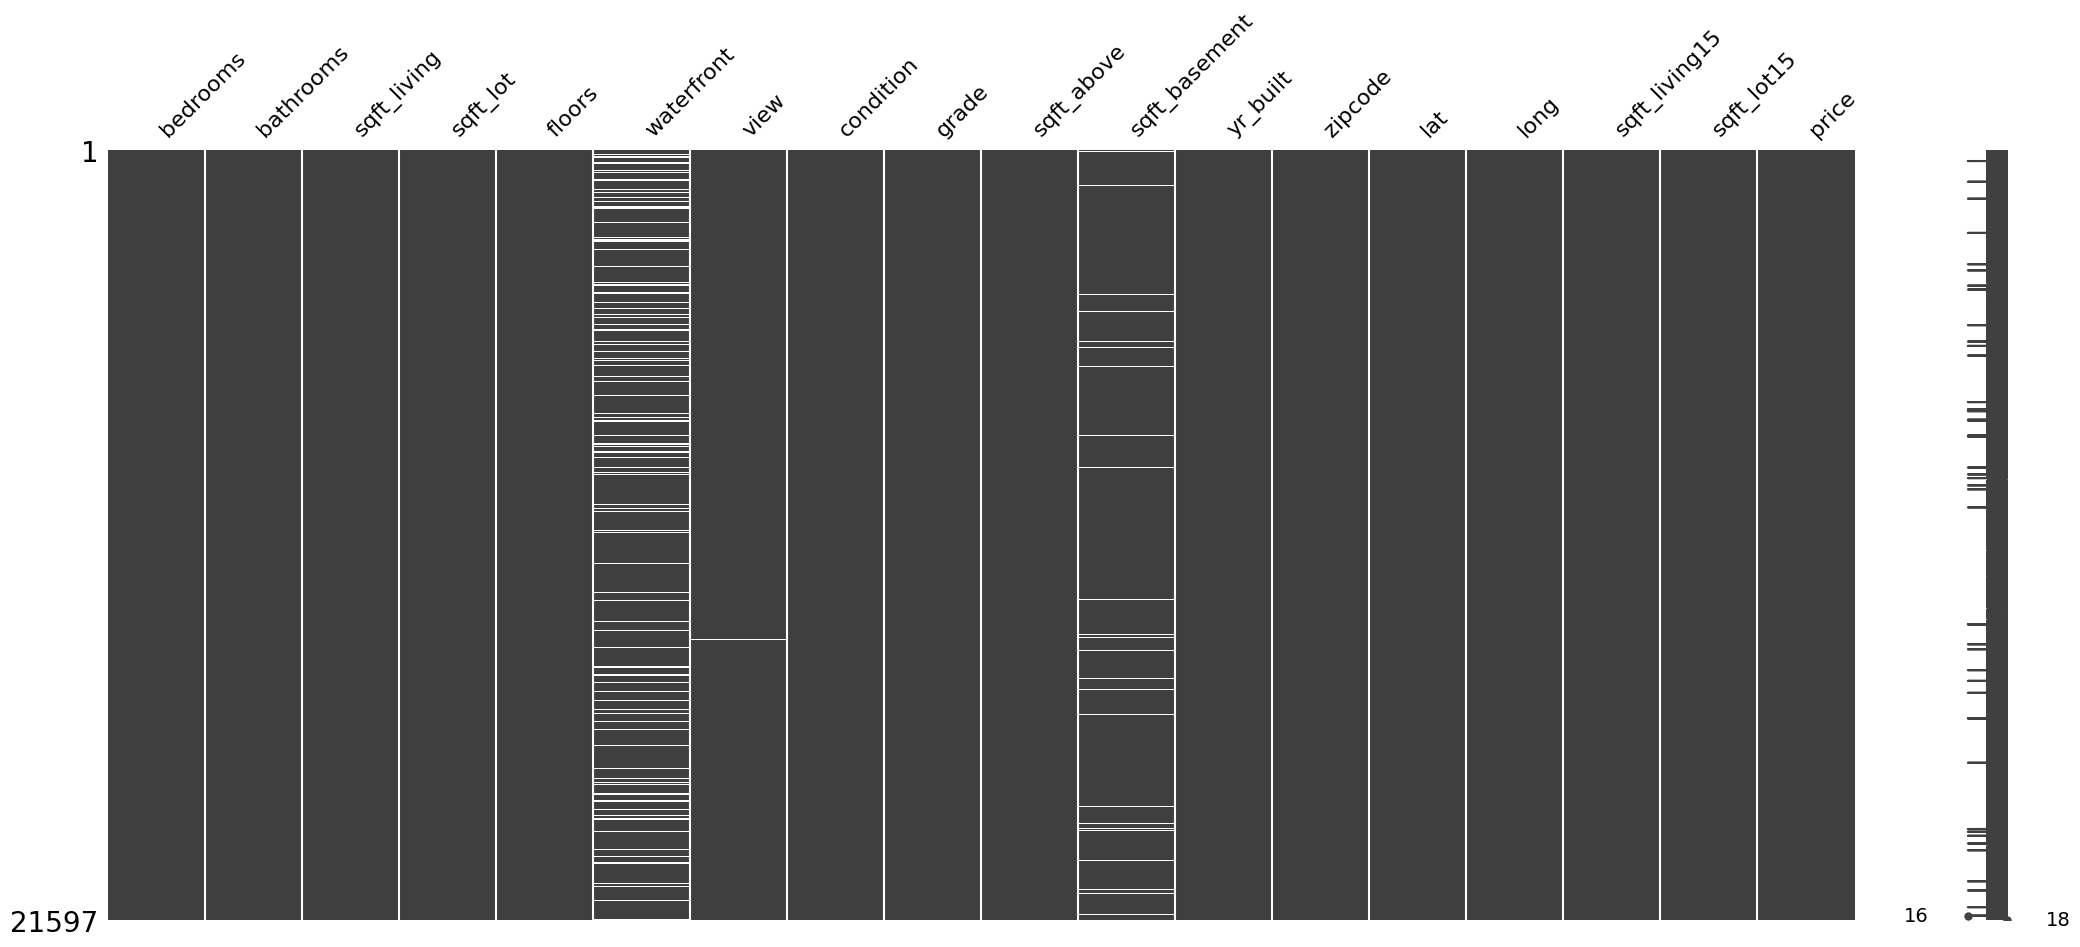

In [7]:
# Initialise the subplot function using number of rows and columns 
msno.matrix(df)
# missing values does not have pattern 

In [8]:
# removal of outlier values 

from data_cleaning import remove_missing_values
from data_cleaning import outlier_handling

df_no_missing_values = remove_missing_values (df)
df = outlier_handling (df_no_missing_values,'price')

df

Removed 1 missing values

After preprocessing
Removed 2906 missing values


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,98125,47.721,-122.319,1690.000,7639.000,538000.000
2,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,98028,47.738,-122.233,2720.000,8062.000,180000.000
3,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,98136,47.521,-122.393,1360.000,5000.000,604000.000
4,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,98074,47.617,-122.045,1800.000,7503.000,510000.000
8,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,1050.000,730.000,1960,98146,47.512,-122.337,1780.000,8113.000,229500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3.000,2.500,1310.000,1294.000,2.000,0.000,0.000,3,8,1180.000,130.000,2008,98116,47.577,-122.409,1330.000,1265.000,475000.000
21592,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,2009,98103,47.699,-122.346,1530.000,1509.000,360000.000
21593,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,2014,98146,47.511,-122.362,1830.000,7200.000,400000.000
21594,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,2009,98144,47.594,-122.299,1020.000,2007.000,402101.000


In [9]:
df.to_csv('data/df_cleaned.csv',index=False)